### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

### Prepare data

In [3]:
data.shape

(30, 2)

In [4]:
X = data.iloc[:,0].values
Y = data.iloc[:,1].values

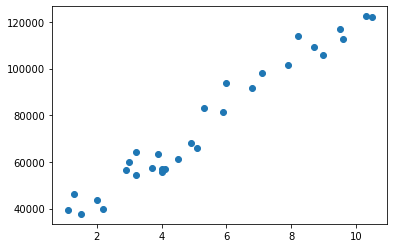

In [5]:
plt.scatter(X,Y)

### Gradient Descent

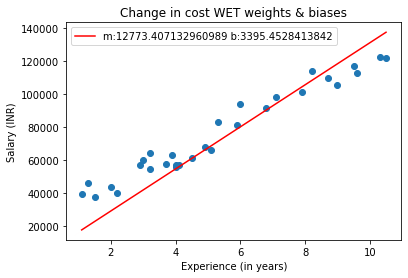

In [9]:
from IPython.display import clear_output

def draw_plot(x1,y1,title):
    plt.plot(x1,y1, 'r', label=title)
    plt.xlabel('Experience (in years)')
    plt.ylabel('Salary (INR)')
    plt.title('Change in cost WRT weights & biases')
    plt.legend()
    plt.pause(.1)
    clear_output(wait=True)
    
def gradient_descent(x,y, m_now = 0, b_now = 0, iters=150, LR=.001):
    df = pd.DataFrame(columns=['weight(m)', 'bias(b)', 'cost'])
    N = len(x)
    
    for i in range(iters):
        ypred = (m_now*x)+b_now
        cost = 0
        
        for err in (y-ypred):
            cost += (err**2)
        
        m_derivation = -(2/N) * sum(x*(y-ypred))
        b_derivation = -(2/N) * sum(y-ypred)
        
        m_now = m_now - (LR * m_derivation)
        b_now = b_now - (LR * b_derivation)
        plt.scatter(x,y)
        
        draw_plot(x, ypred, 'm:{} b:{}'.format(m_now, b_now))
        df.loc[i] = [m_now, b_now, cost]
   
    return df

results = gradient_descent(X,Y)

In [8]:
results

weight(m)      bias(b)          cost
0      954.797400   152.006000  1.950887e+11
1     1839.202244   293.561674  1.680783e+11
2     2658.396193   425.435962  1.448977e+11
3     3417.179488   548.341200  1.250037e+11
4     4119.999020   662.937290  1.079302e+11
..            ...          ...           ...
145  12778.988648  3357.506031  4.205111e+09
146  12777.593801  3366.998966  4.202347e+09
147  12776.198552  3376.487738  4.199586e+09
148  12774.802973  3385.972359  4.196827e+09
149  12773.407133  3395.452841  4.194070e+09

[150 rows x 3 columns]

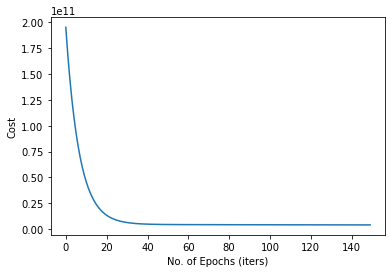

In [11]:
results.iloc[:,2].plot()
plt.xlabel('No. of Epochs (iters)')
plt.ylabel('Cost')
plt.show()